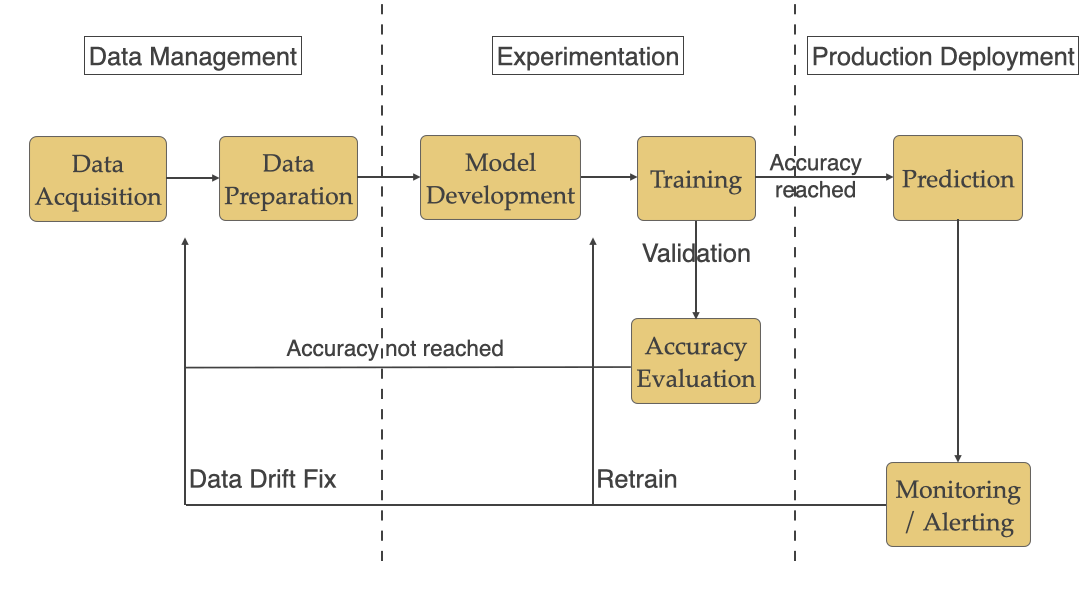

In [1]:
import plotly
import plotly.io as pio
import plotly.graph_objects as go

import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.decomposition     import PCA
from sklearn.manifold          import TSNE
from plotly.subplots           import make_subplots
from sklearn.preprocessing     import StandardScaler
from sklearn.dummy             import DummyClassifier
from sklearn.model_selection   import train_test_split
from sklearn.metrics           import confusion_matrix
from sklearn.ensemble          import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV

np.random.seed(47)

pio.templates.default = 'plotly_dark'
plotly.offline.init_notebook_mode(connected=True)

%matplotlib inline
plt.style.use('dark_background')
sns.set()

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'
df = pd.read_csv(url)

In [3]:
df.size

19915

In [4]:
df.head(10)
#419 null values

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440,0.804347
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750,NaN


In [5]:
df.drop('exame_33', axis = 1, inplace = True)

In [6]:
X = df.drop(['id', 'diagnostico'], axis = 1)
y = df['diagnostico']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
mdl_random = RandomForestClassifier(n_jobs = -1, n_estimators = 500, max_depth = 10)

In [9]:
mdl_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1)

In [10]:
print(f'RandomForest Score: {(mdl_random.score(X_test, y_test)*100).round(2)}%')

RandomForest Score: 95.91%


In [11]:
mdl_dummy = DummyClassifier(strategy = 'most_frequent')

In [12]:
mdl_dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [13]:
print(f'Baseline(Dummy) score: {(mdl_dummy.score(X_test, y_test)*100).round(2)}%')

Baseline(Dummy) score: 63.16%


# EDA

## exploratory visualization

In [14]:
"""data   = [go.Bar(x = [1, 2, 3],  y = [1, 3, 2])]
layout = go.Layout(title = go.layout.Title(text = 'A Figure Specified by a Graph Object'),
                   width = 700, height = 500)

fig = go.Figure(data = data, layout = layout)

fig.show()"""

"data   = [go.Bar(x = [1, 2, 3],  y = [1, 3, 2])]\nlayout = go.Layout(title = go.layout.Title(text = 'A Figure Specified by a Graph Object'),\n                   width = 700, height = 500)\n\nfig = go.Figure(data = data, layout = layout)\n\nfig.show()"

In [15]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(data = scaler.fit_transform(X),
                        columns = X.keys())

In [16]:
#exams 1-10
concat_df_v1 = pd.concat([y, scaled_X.iloc[:, :10]], axis = 1)
melt_df_v1   = pd.melt(concat_df_v1, id_vars = 'diagnostico', var_name = 'exames',
                   value_name = 'valores')

#exams 11-21
concat_df_v2 = pd.concat([y, scaled_X.iloc[:, 10:21]], axis = 1)
melt_df_v2   = pd.melt(concat_df_v2, id_vars = 'diagnostico', var_name = 'exames',
                   value_name = 'valores')

#exams 21-32
concat_df_v3 = pd.concat([y, scaled_X.iloc[:, 21:]], axis = 1)
melt_df_v3   = pd.melt(concat_df_v3, id_vars = 'diagnostico', var_name = 'exames',
                   value_name = 'valores')

In [17]:
fig = make_subplots(rows = 3, cols = 1)

#exams 1 - 10
fig.add_trace(go.Violin(x = melt_df_v1['exames'][melt_df_v1['diagnostico'] == 'M'],
                        y = melt_df_v1['valores'][melt_df_v1.diagnostico == 'M'],
                        legendgroup = 'M', scalegroup = 'M', name = 'M',
                        side='negative', line_color='blue'), row = 1, col = 1)
              
fig.add_trace(go.Violin(x = melt_df_v1['exames'][melt_df_v1['diagnostico'] == 'B'],
                        y = melt_df_v1['valores'][melt_df_v1.diagnostico == 'B'],
                        legendgroup = 'B', scalegroup = 'B', name = 'B',
                        side='positive', line_color='red'), row = 1, col = 1) 
#exams 11 - 21
fig.add_trace(go.Violin(x = melt_df_v2['exames'][melt_df_v2['diagnostico'] == 'M'],
                        y = melt_df_v2['valores'][melt_df_v2.diagnostico == 'M'],
                        legendgroup = 'M', scalegroup = 'M', name = 'M',
                        side='negative', line_color='blue'), row = 2, col = 1)
              
fig.add_trace(go.Violin(x = melt_df_v2['exames'][melt_df_v2['diagnostico'] == 'B'],
                        y = melt_df_v2['valores'][melt_df_v2.diagnostico == 'B'],
                        legendgroup = 'B', scalegroup = 'B', name = 'B',
                        side='positive', line_color='red'), row = 2, col = 1) 
#exams 22 - 32
fig.add_trace(go.Violin(x = melt_df_v3['exames'][melt_df_v3['diagnostico'] == 'M'],
                        y = melt_df_v3['valores'][melt_df_v3.diagnostico == 'M'],
                        legendgroup = 'M', scalegroup = 'M', name = 'M',
                        side='negative', line_color='blue'), row = 3, col = 1)
              
fig.add_trace(go.Violin(x = melt_df_v3['exames'][melt_df_v3['diagnostico'] == 'B'],
                        y = melt_df_v3['valores'][melt_df_v3.diagnostico == 'B'],
                        legendgroup = 'B', scalegroup = 'B', name = 'B',
                        side='positive', line_color='red'), row = 3, col = 1) 

#plot update
fig.update_layout(title_text = 'Exam valor by cancer type',
                   width = 1300, height = 1000)
fig.update_traces(meanline_visible=True)
fig.show()

In [18]:
scaled_X.drop(['exame_4', 'exame_29'], axis = 1, inplace = True)

In [19]:
def classifier(X, y):
    
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size = 0.2)
    
    mdl = RandomForestClassifier(n_jobs = -1, n_estimators = 500, max_depth = 10)
    mdl.fit(X_tr, y_tr)
    
    print(f'RandomForest Score: {(mdl.score(X_val, y_val)*100).round(2)}%')

In [20]:
classifier(scaled_X, y)

RandomForest Score: 92.98%


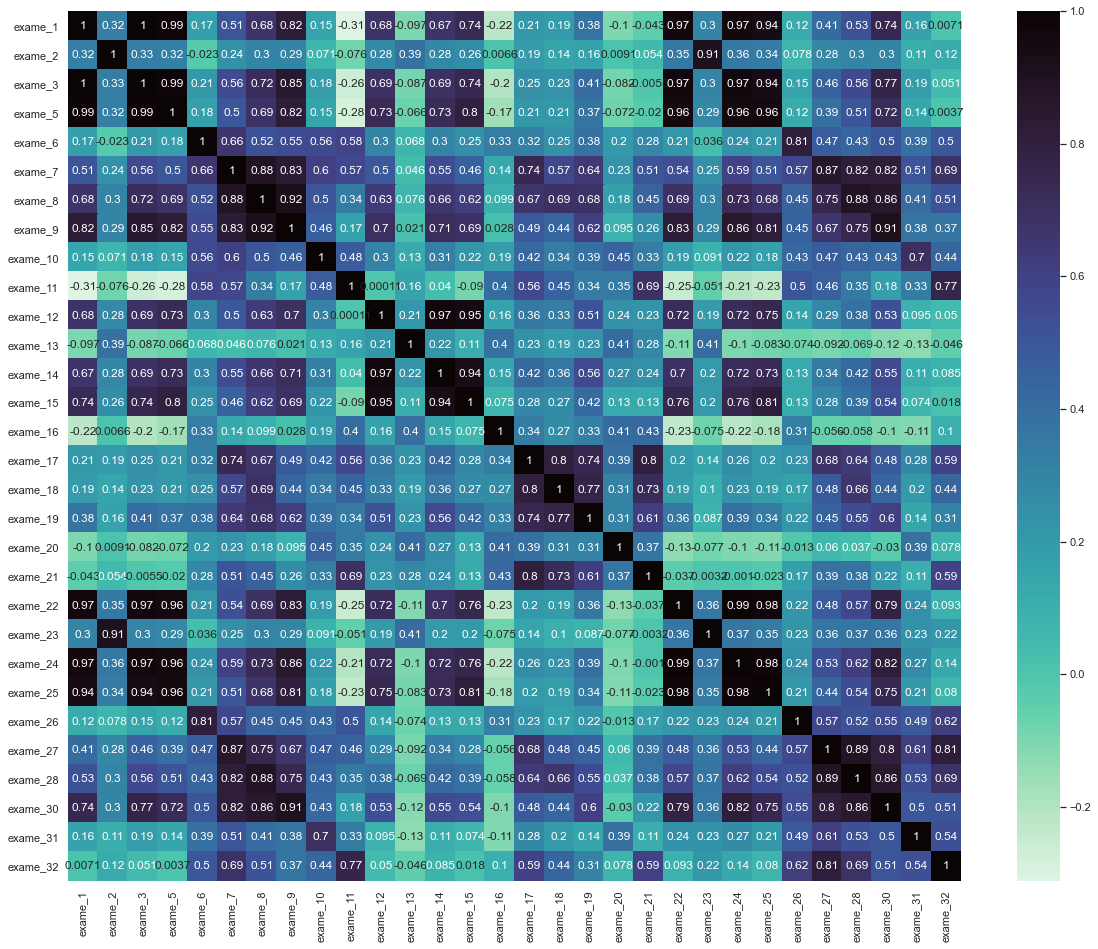

In [21]:
plt.rcParams['figure.figsize'] = (20, 16)
ax = sns.heatmap(scaled_X.corr(), annot = True, cmap = 'mako_r')

plt.show()

In [22]:
corr_mat = scaled_X.corr()[scaled_X.corr() > 0.99].sum()
corr_mat

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [23]:
corr_mat_v2 = corr_mat[corr_mat > 1]
corr_mat_v2

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [24]:
corr_mat_v2.keys()

Index(['exame_1', 'exame_3', 'exame_22', 'exame_24'], dtype='object')

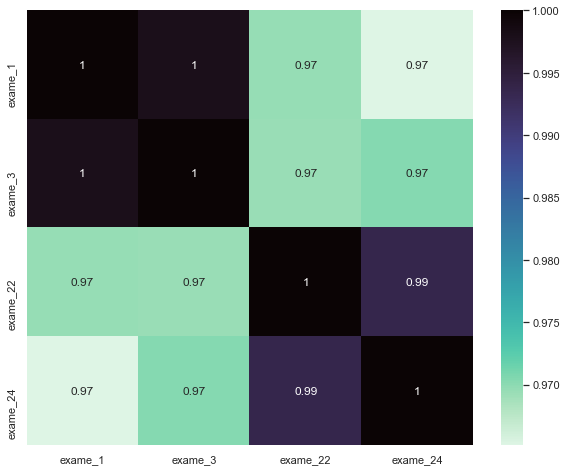

In [25]:
plt.rcParams['figure.figsize'] = (10, 8)
ax = sns.heatmap(scaled_X[['exame_1', 'exame_3', 'exame_22', 'exame_24']].corr(), annot = True,
                cmap = 'mako_r')


In [26]:
scaled_X.drop(['exame_2', 'exame_24'], axis = 1, inplace = True)

In [27]:
classifier(scaled_X, y)

RandomForest Score: 97.37%


In [28]:
k_best = SelectKBest(chi2, k = 10)
k_best

SelectKBest(score_func=<function chi2 at 0x000001EDA833C1F8>)

In [29]:
X.drop(['exame_3','exame_29', 'exame_24', 'exame_4'], axis = 1, inplace = True)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
k_best.fit(X_train, y_train)

SelectKBest(score_func=<function chi2 at 0x000001EDA833C1F8>)

In [32]:
X_train = k_best.transform(X_train)
X_test  = k_best.transform(X_test)

In [33]:
mdl_random = RandomForestClassifier(n_jobs = -1, n_estimators = 100, max_depth = 10)
mdl_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1)

In [34]:
pred_random = mdl_random.predict(X_test)
mdl_random.score(X_test, y_test)

0.9649122807017544

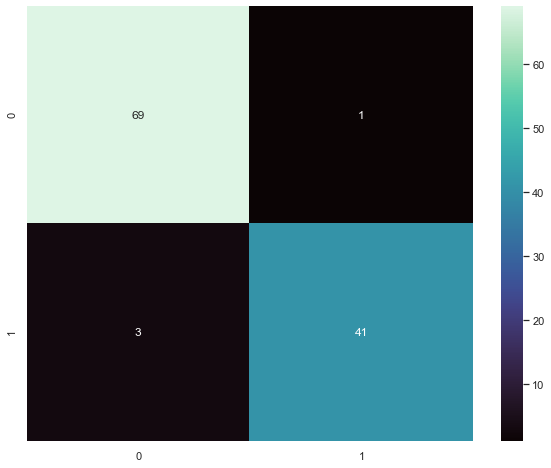

In [35]:
sns.heatmap(confusion_matrix(y_test, pred_random), annot = True, cmap = 'mako')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
feat_rfe = RFE(mdl_random, n_features_to_select = 10, step = 1)

In [38]:
feat_rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1),
    n_features_to_select=10)

In [39]:
X_train = feat_rfe.transform(X_train)
X_test  = feat_rfe.transform(X_test)

In [40]:
mdl_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1)

In [41]:
pred_random = mdl_random.predict(X_test)
mdl_random.score(X_test, y_test)

0.9649122807017544

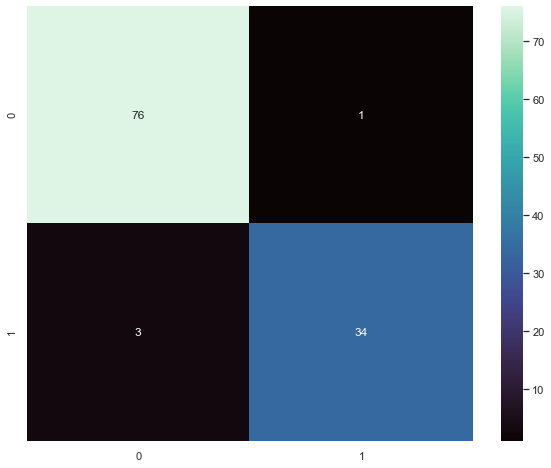

In [42]:
sns.heatmap(confusion_matrix(y_test, pred_random), annot = True, cmap = 'mako')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [44]:
feat_rfe = RFECV(mdl_random, cv = 5, step = 1, scoring = 'accuracy')

In [45]:
feat_rfe.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestClassifier(max_depth=10, n_jobs=-1),
      scoring='accuracy')

In [46]:
X_train = feat_rfe.transform(X_train)
X_test  = feat_rfe.transform(X_test)

In [47]:
mdl_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1)

In [48]:
pred_random = mdl_random.predict(X_test)
mdl_random.score(X_test, y_test)

0.9824561403508771

In [49]:
mdl_random.score(X_test, y_test)

0.9824561403508771

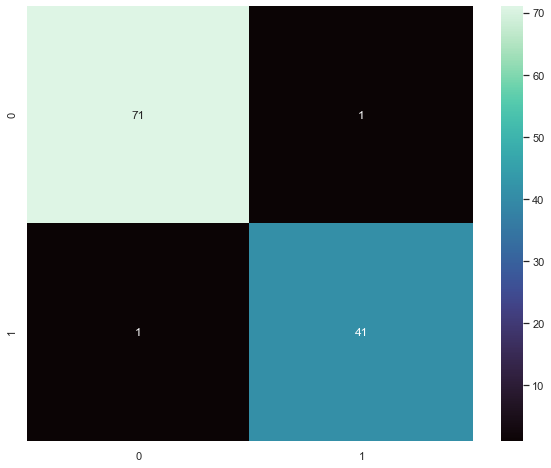

In [50]:
sns.heatmap(confusion_matrix(y_test, pred_random), annot = True, cmap = 'mako')

In [51]:
X.columns[feat_rfe.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_8', 'exame_9', 'exame_15',
       'exame_22', 'exame_23', 'exame_25', 'exame_28', 'exame_30', 'exame_31'],
      dtype='object')

In [52]:
feat_rfe.grid_scores_

array([0.87252747, 0.91868132, 0.93186813, 0.93186813, 0.93846154,
       0.93186813, 0.92967033, 0.94285714, 0.94945055, 0.94945055,
       0.94945055, 0.96043956, 0.94505495, 0.95604396, 0.95824176,
       0.95604396, 0.95604396, 0.94725275, 0.95164835, 0.94725275,
       0.95164835, 0.94725275, 0.95384615, 0.95604396, 0.94505495,
       0.95164835, 0.95164835, 0.95384615])

Text(0, 0.5, 'Acurácia')

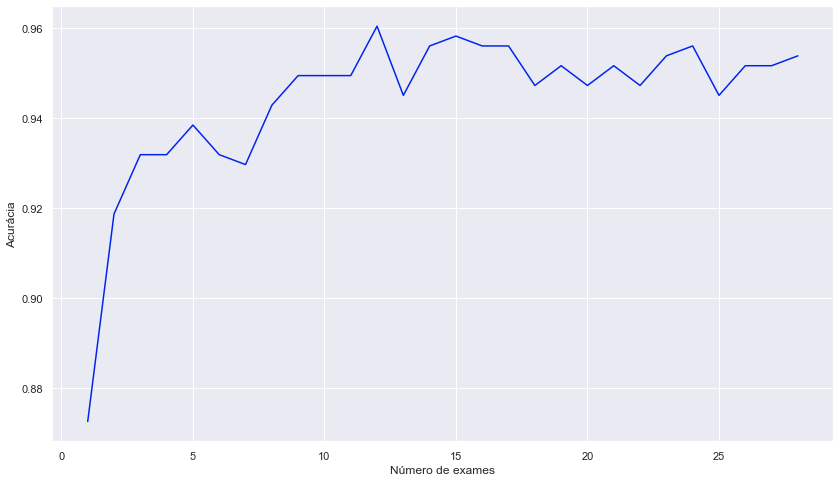

In [53]:
plt.figure(figsize = (14,8))
sns.set(palette = 'winter')
sns.lineplot(x = range(1, len(feat_rfe.grid_scores_)+1), y =feat_rfe.grid_scores_)
#plt.plot(x = range(1, len(feat_rfe.grid_scores_)+1), y =feat_rfe.grid_scores_)

plt.xlabel('Número de exames')
plt.ylabel('Acurácia')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
feat_rfe = RFE(mdl_random, n_features_to_select = 10, step = 1)

In [56]:
feat_rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1),
    n_features_to_select=10)

In [57]:
X_train = feat_rfe.transform(X_train)
X_test  = feat_rfe.transform(X_test)

In [58]:
mdl_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1)

In [59]:
pred_random = mdl_random.predict(X_test)
mdl_random.score(X_test, y_test)

0.9649122807017544

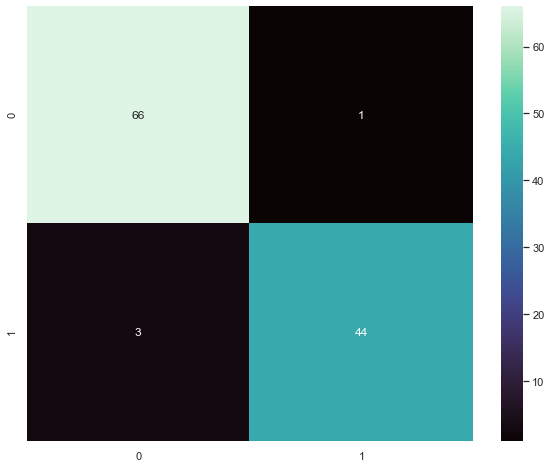

In [60]:
sns.heatmap(confusion_matrix(y_test, pred_random), annot = True, cmap = 'mako')

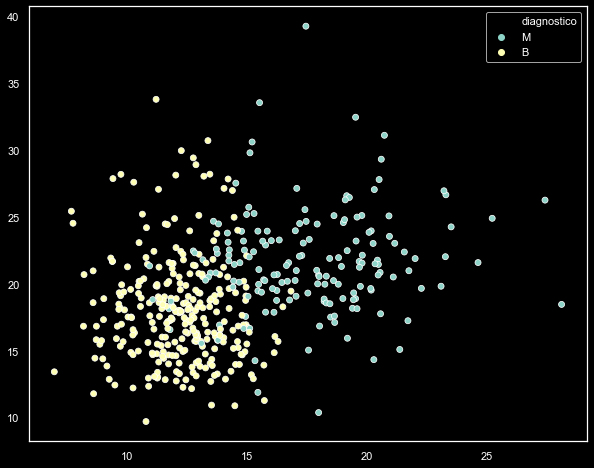

In [61]:
sns.set(palette = 'Pastel2')
plt.style.use('dark_background')
sns.scatterplot(x = X_train[:, 0], y = X_train[:, 1], hue = y_train)
plt.grid(False)
plt.rcParams['figure.figsize'] = (20, 8)

In [70]:
pca = PCA(n_components = 2)
#fazer com dados normalizados
X_pca = pca.fit_transform(X_train)

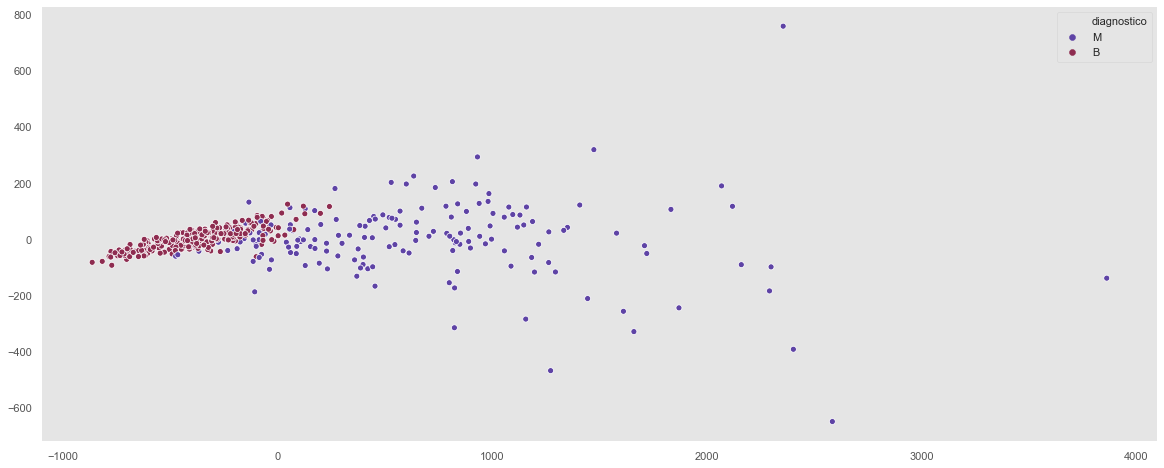

In [75]:
plt.style.use('ggplot')
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = y_train, palette = 'twilight')
plt.grid(False)
plt.rcParams['figure.figsize'] = (20, 8)

In [78]:
tsne = TSNE(n_components = 2)
#fazer com dados normalizados
X_tsne = tsne.fit_transform(scaled_X)

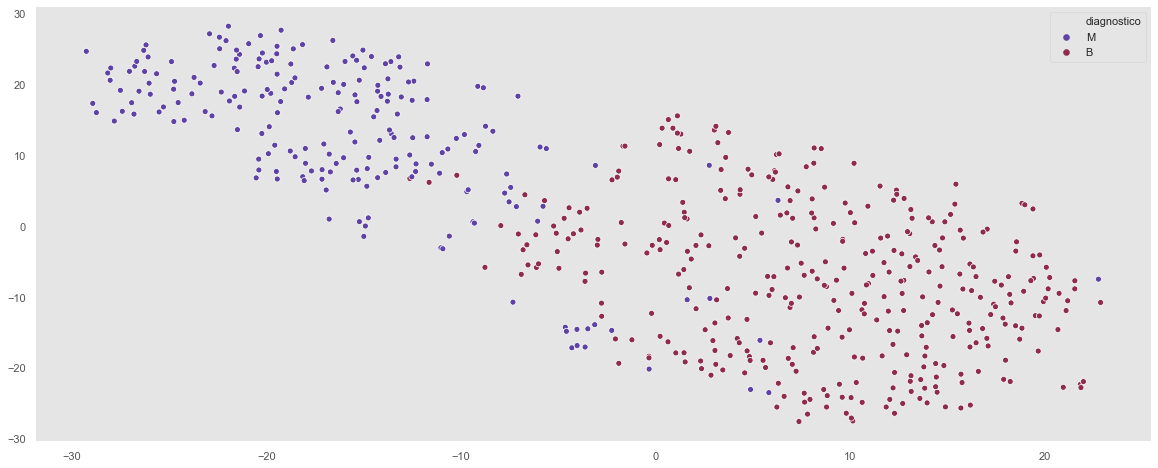

In [80]:
plt.style.use('ggplot')
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue = y, palette = 'twilight')
plt.grid(False)
plt.rcParams['figure.figsize'] = (20, 8)